## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


### 2. Load the dataset and display a sample of five rows of the data frame.

In [107]:


dataset_path = "heart_2020_cleaned.csv"


df = pd.read_csv(dataset_path)

# Display a sample of five rows
sample = df.sample(n=5)  
print(sample)


       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
9885             No  29.29      No              No     No             0.0   
174649           No  35.78      No              No     No             0.0   
221675           No  23.52     Yes              No     No             0.0   
279163           No  23.67      No              No     No             0.0   
77941            No  39.05      No              No     No             0.0   

        MentalHealth DiffWalking     Sex AgeCategory      Race Diabetic  \
9885             2.0          No  Female       55-59  Hispanic      Yes   
174649          30.0          No  Female       65-69     White       No   
221675           0.0          No  Female       70-74     White       No   
279163           7.0          No    Male       50-54     White       No   
77941            0.0          No    Male       60-64     White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
9885  

### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [3]:


# Check the shape of the data 
print("Shape of the DataFrame:")
print(df.shape)

# Check general information
print("\nGeneral information:")
print(df.info())

Shape of the DataFrame:
(319795, 18)

General information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  fl

### 4. Check the statistical summary of the dataset and write your inferences.

In [4]:
# Check the statistical summary of the dataset
print("Statistical summary of the dataset:")
print(df.describe())

Statistical summary of the dataset:
                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [5]:
# Check the percentage of missing values 
missing_percentages = df.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_percentages)

# Drop missing values
if df.isnull().values.any():
    df = df.dropna()

# Confirm 
print("\nAfter dropping missing values:")
print(df.info())

Percentage of missing values in each column:
HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

After dropping missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [6]:

# Checking any duplicate rows
duplicate_rows = df.duplicated()

if duplicate_rows.any():
    print("Duplicate rows found.")

    # Drop duplicate rows
    df.drop_duplicates(inplace=True)

    # Checking after dropping duplicates
    print("Shape of the DataFrame after dropping duplicates:")
    print(df.shape)
else:
    print("No duplicate rows found.")


Duplicate rows found.
Shape of the DataFrame after dropping duplicates:
(301717, 18)


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

In [7]:
# Checking the distribution of the target variable
target_distribution = df['HeartDisease'].value_counts(normalize=True) * 100

print("Distribution of the target variable:")
print(target_distribution)


Distribution of the target variable:
No     90.964712
Yes     9.035288
Name: HeartDisease, dtype: float64


### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

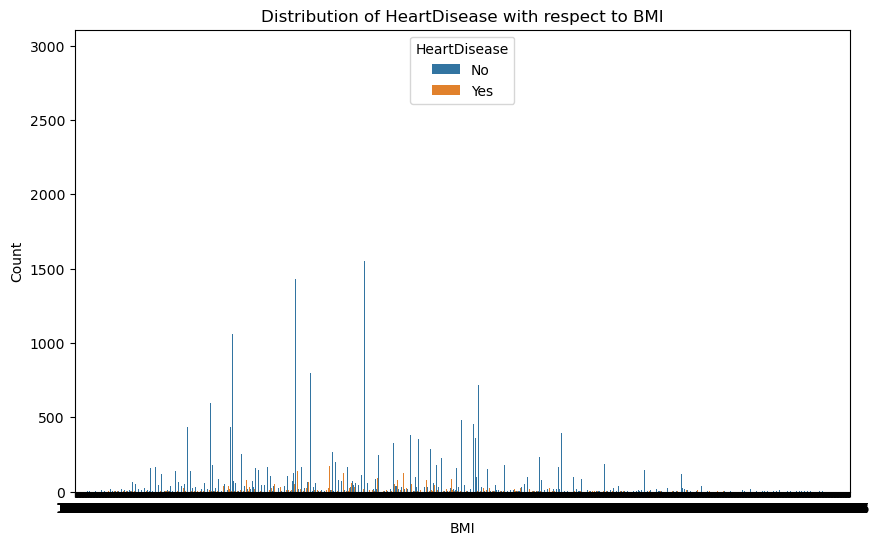

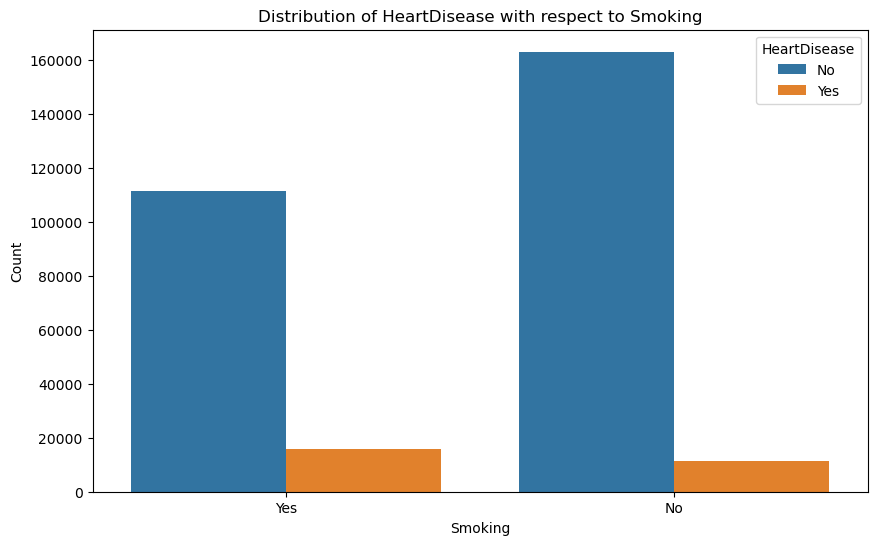

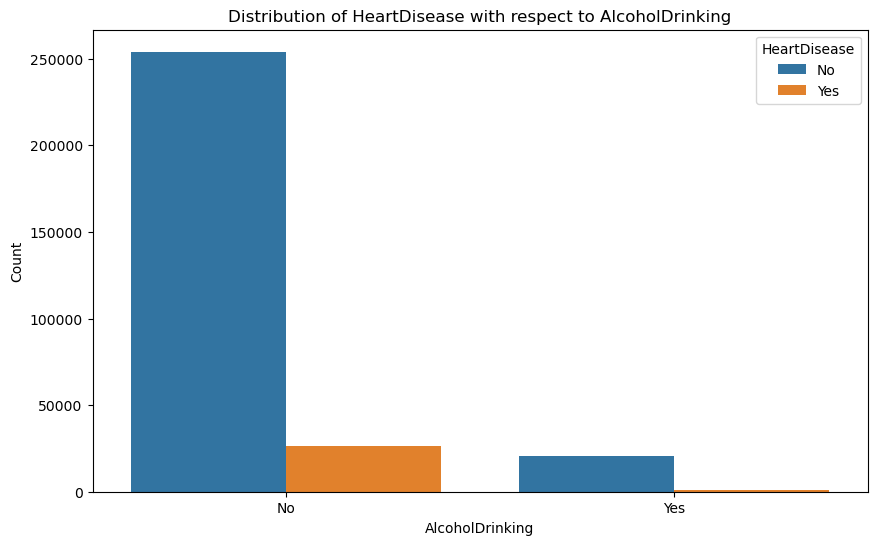

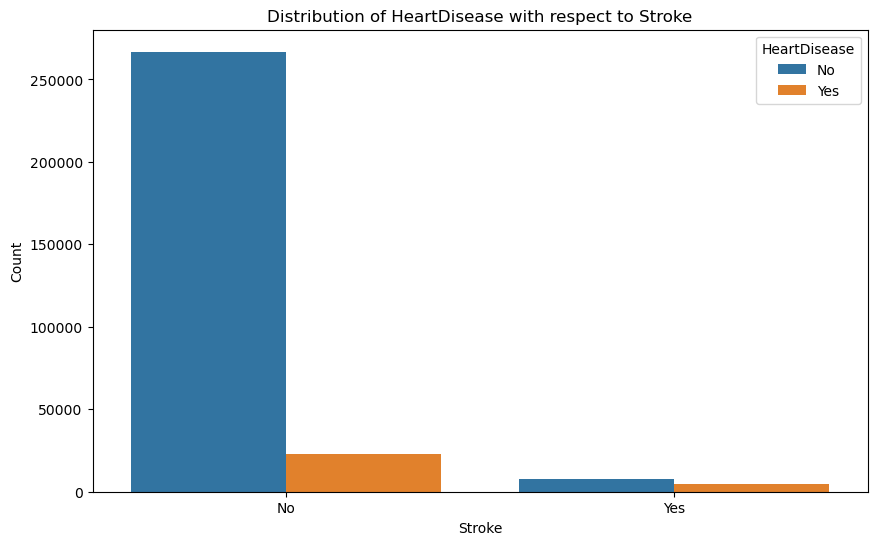

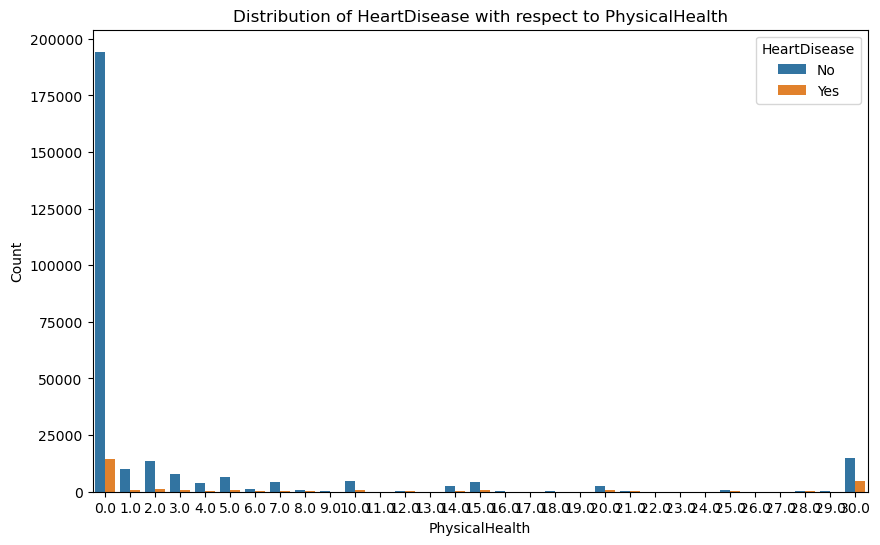

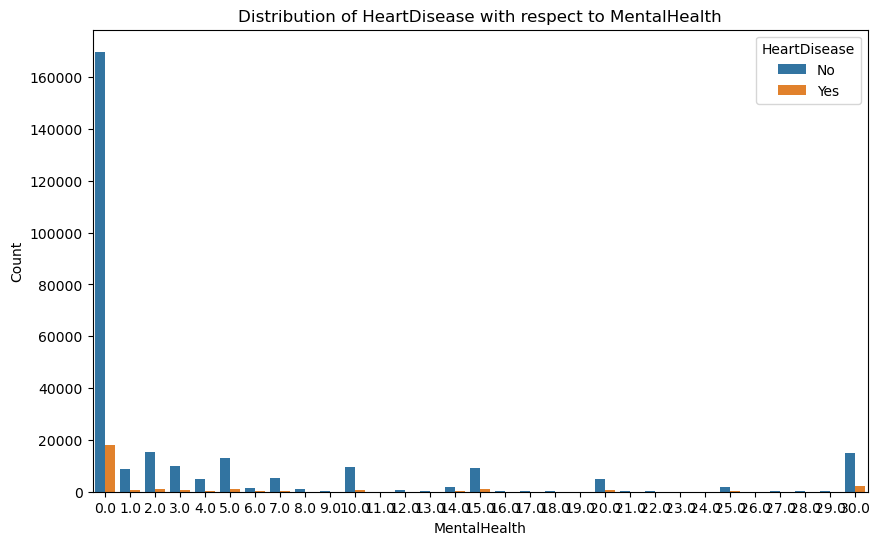

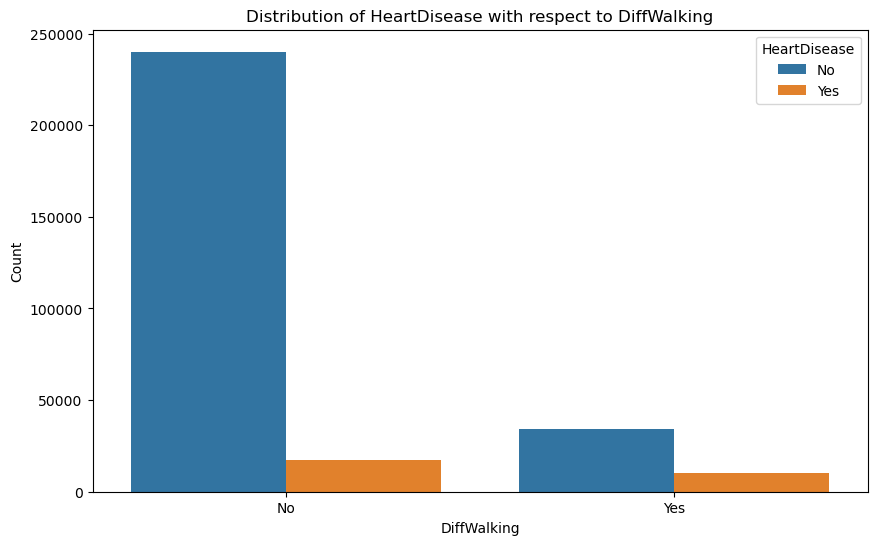

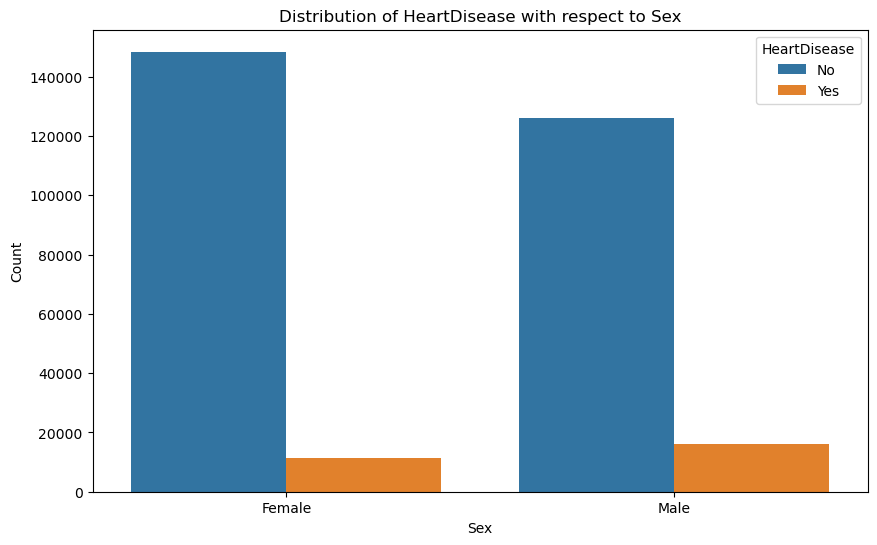

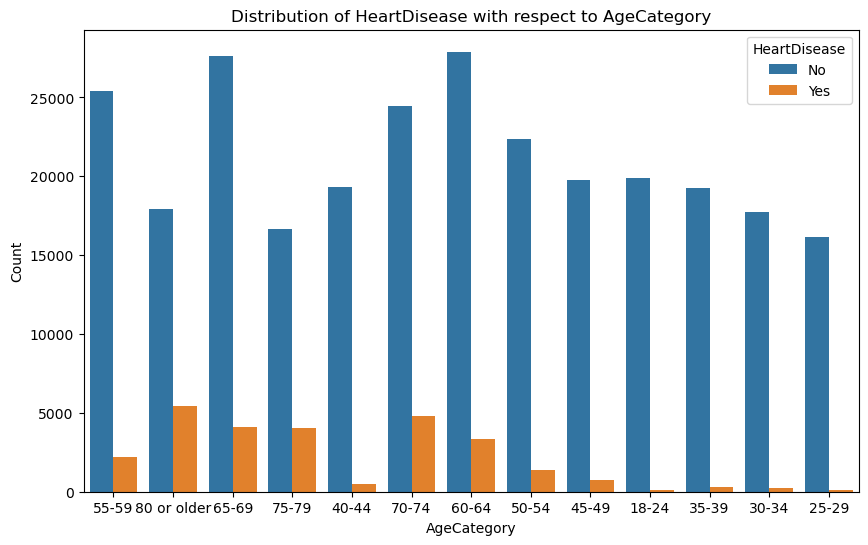

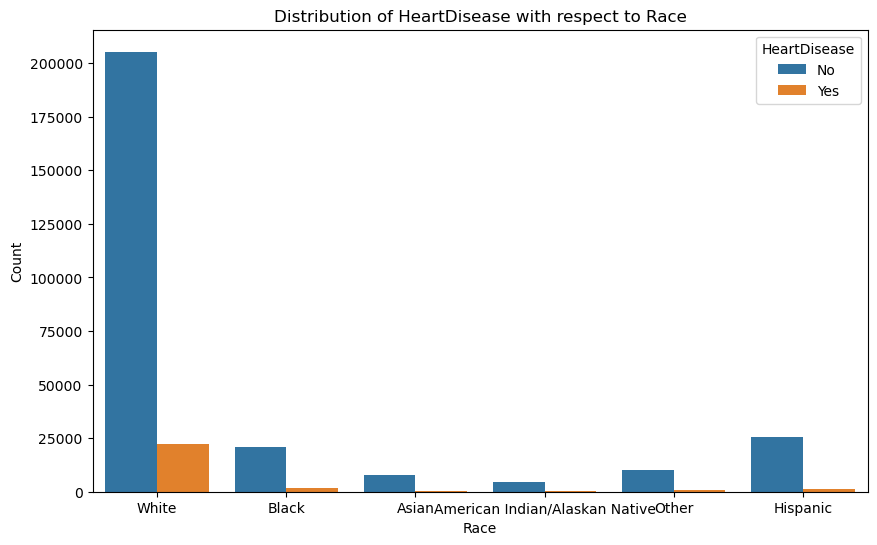

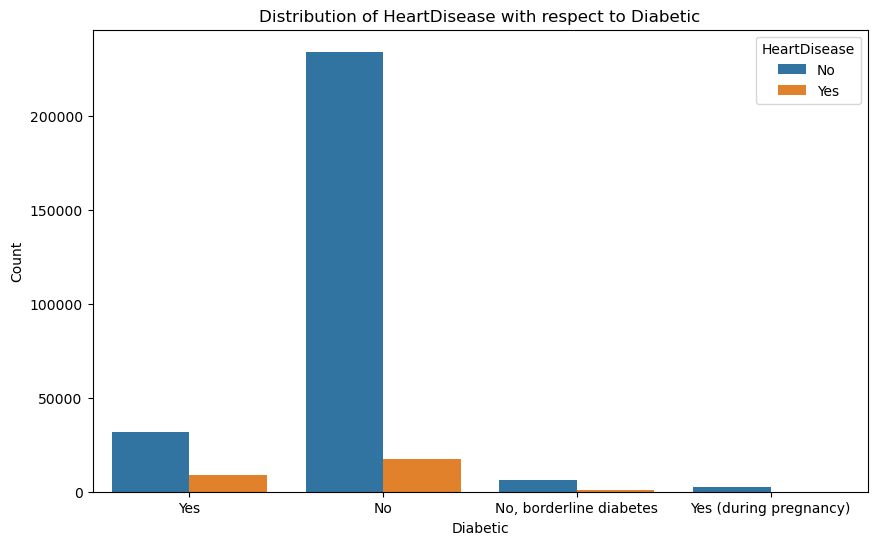

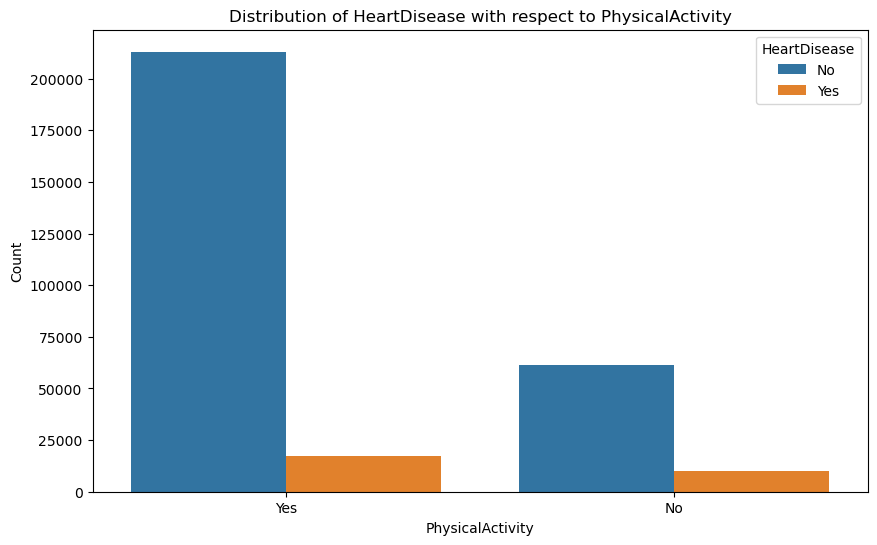

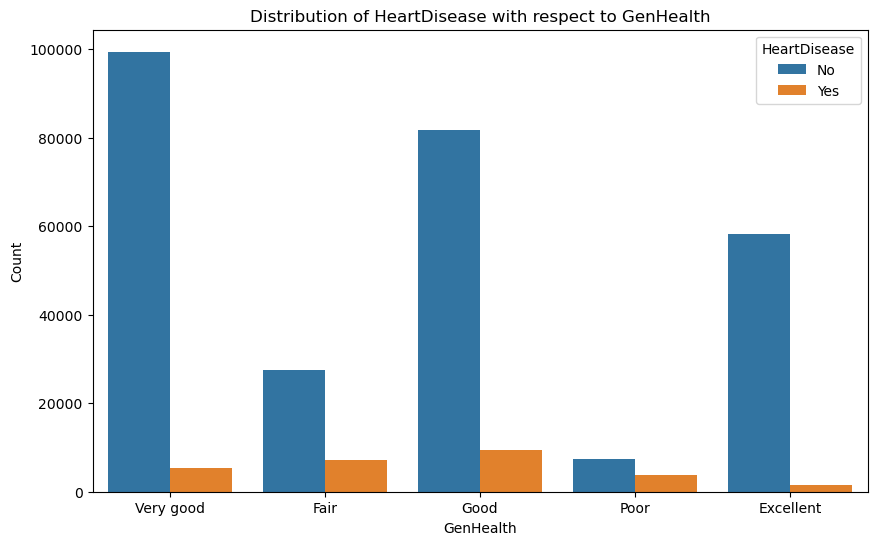

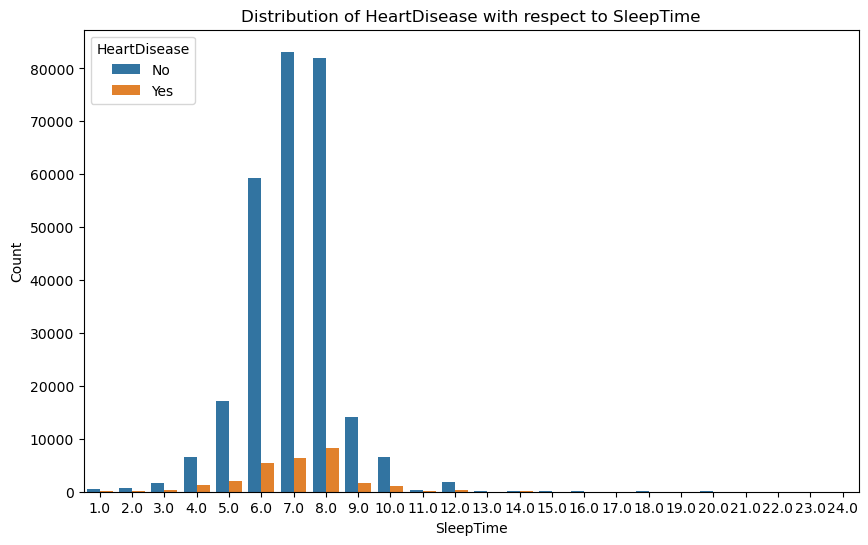

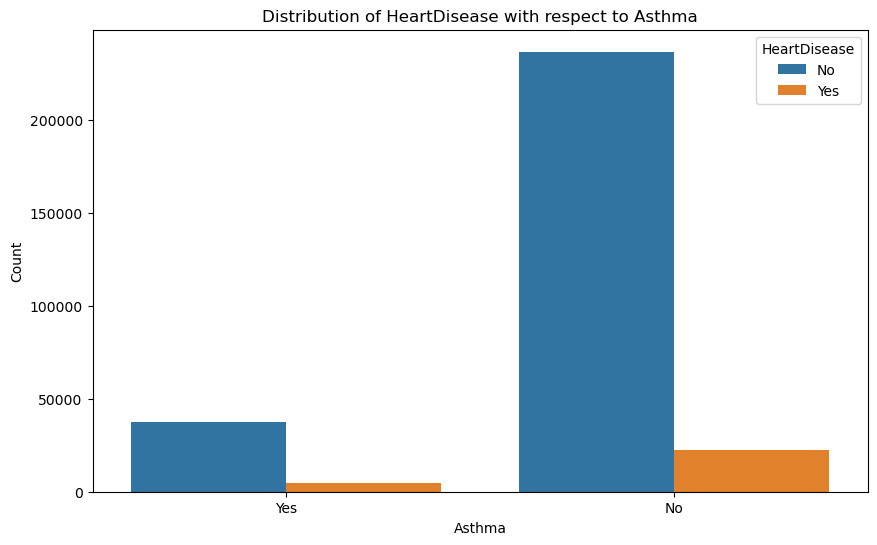

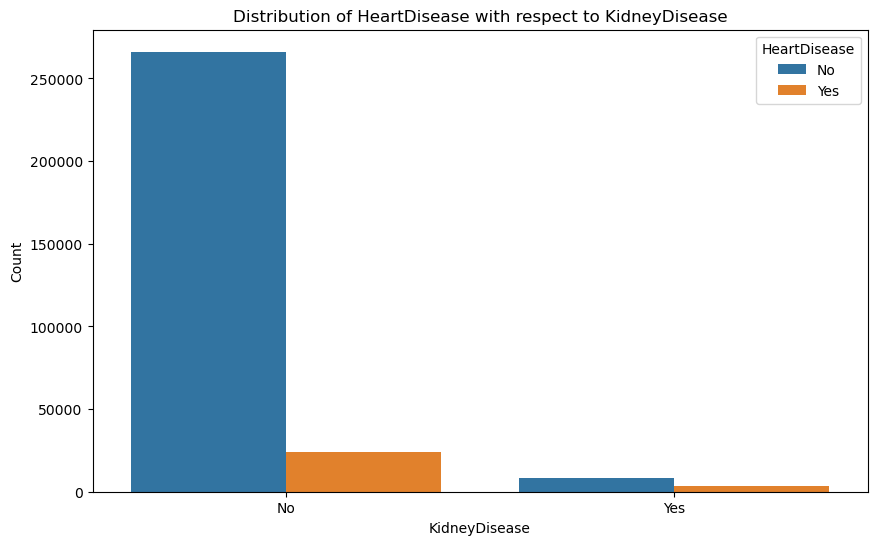

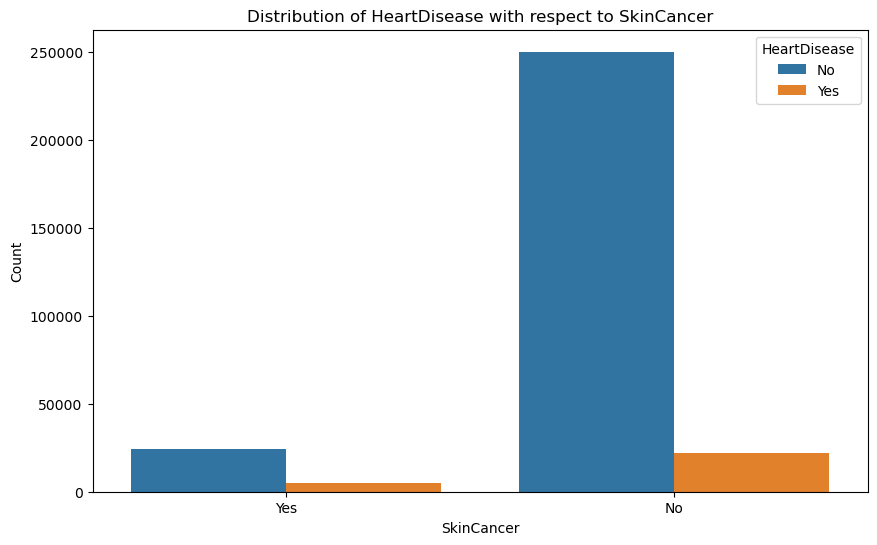

In [18]:


target_column = 'HeartDisease'
categorical_features = ['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer'
]

# Visualize
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue=target_column, data=df)
    plt.title(f"Distribution of {target_column} with respect to {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title=target_column)
    plt.show()


### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [19]:
# unique categories
unique_categories = df['Diabetic'].unique()
print("Unique categories in the column:")
print(unique_categories)

# Replace
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'})

# Confirm the replacements
updated_categories = df['Diabetic'].unique()
print("\nUnique categories after replacement:")
print(updated_categories)


Unique categories in the column:
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

Unique categories after replacement:
['Yes' 'No']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [17]:
target_column = 'HeartDisease'
df[target_column] = df[target_column].replace({'No': 0, 'Yes': 1})

In [19]:
df.to_csv("heart_2020_cleaned_modified.csv", index=False)

In [20]:
print(df)

        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                  0  16.60     Yes              No     No             3.0   
1                  0  20.34      No              No    Yes             0.0   
2                  0  26.58     Yes              No     No            20.0   
3                  0  24.21      No              No     No             0.0   
4                  0  23.71      No              No     No            28.0   
...              ...    ...     ...             ...    ...             ...   
319790             1  27.41     Yes              No     No             7.0   
319791             0  29.84     Yes              No     No             0.0   
319792             0  24.24      No              No     No             0.0   
319793             0  32.81      No              No     No             0.0   
319794             0  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [35]:
# label encoded
label_encode_columns = ['AgeCategory','Race','GenHealth']

# dummy encoded
dummy_encode_columns = ['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','Sex','Diabetic','PhysicalActivity','SleepTime','Asthma','KidneyDisease','SkinCancer'
]

# label encoding
label_encoder = LabelEncoder()
for column in label_encode_columns:
    df['AgeCategory','Race','GenHealth'] = label_encoder.fit_transform(df[column])

#dummy encoding
df = pd.get_dummies(df, columns=dummy_encode_columns)

# Display 
print(df.head())


  HeartDisease  AgeCategory   Race  GenHealth  (AgeCategory, Race, GenHealth)  \
0           No        55-59  White  Very good                               4   
1           No  80 or older  White  Very good                               4   
2           No        65-69  White       Fair                               1   
3           No        75-79  White       Good                               2   
4           No        40-44  White  Very good                               4   

   BMI_12.02  BMI_12.08  BMI_12.13  BMI_12.16  BMI_12.2  ...  SleepTime_21.0  \
0          0          0          0          0         0  ...               0   
1          0          0          0          0         0  ...               0   
2          0          0          0          0         0  ...               0   
3          0          0          0          0         0  ...               0   
4          0          0          0          0         0  ...               0   

   SleepTime_22.0  SleepTime_23.

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [32]:
# label encoded
label_encode_columns = ['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','Sex','Diabetic','PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

# label encoding
label_encoder = LabelEncoder()
for column in label_encode_columns:
    df['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','Sex','Diabetic','PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer'] = label_encoder.fit_transform(df[column])

# Display 
print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  \
0              Yes  Very good        5.0    Yes            No        Yes   
1     

In [33]:

X = df.drop(['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','Sex','Diabetic','PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

y = df['HeartDisease']

print("X:")
print(X.head())
print("\ny:")
print(y.head())


X:
  HeartDisease  AgeCategory   Race  GenHealth  \
0           No        55-59  White  Very good   
1           No  80 or older  White  Very good   
2           No        65-69  White       Fair   
3           No        75-79  White       Good   
4           No        40-44  White  Very good   

   (BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, Diabetic, PhysicalActivity, SleepTime, Asthma, KidneyDisease, SkinCancer)  
0                                                  1                                                                                                                  
1                                                  0                                                                                                                  
2                                                  0                                                                                                                  
3                                 

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [40]:

X = df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']]
y = df['HeartDisease']

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Printing train and test data
print("Train data shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Test data shape - X_test:", X_test.shape, "y_test:", y_test.shape)


Train data shape - X_train: (223856, 14) y_train: (223856,)
Test data shape - X_test: (95939, 14) y_test: (95939,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [41]:
X = df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']]
y = df['HeartDisease']

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Printing standardized train and test data
print("Standardized train data:")
print(X_train.head())
print("\nStandardized test data:")
print(X_test.head())

Standardized train data:
             BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
303145 -1.229576      No              No     No        0.080386     -0.490018   
61634   0.391450      No              No     No       -0.423721     -0.490018   
117690  0.877286      No              No     No       -0.423721     -0.490018   
132104 -1.059769     Yes              No     No       -0.423721     -0.490018   
262165 -0.405699      No              No     No       -0.423721     -0.490018   

       DiffWalking     Sex Diabetic PhysicalActivity  SleepTime Asthma  \
303145          No  Female       No              Yes   0.628794     No   
61634           No  Female      Yes              Yes  -0.067283     No   
117690          No    Male      Yes              Yes  -0.763360     No   
132104          No    Male       No              Yes   0.628794     No   
262165          No  Female       No              Yes  -0.067283    Yes   

       KidneyDisease SkinCancer  
303145   

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [110]:
X = df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']]
y = df['HeartDisease']

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [140]:
def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
  
    model= LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
   
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [124]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]  

In [147]:

 # To get the accuracy score
accuracy_score = train_and_evaluate_model(X_train, y_train, X_test, y_test)

    print("Accuracy Score:",accuracy_score)

if __name__ == "__main__":
    main()

IndentationError: unexpected indent (2817027292.py, line 4)

### Conclusion

----
## Happy Learning:)
----